In [ ]:
#Importing required libraries
import os
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter

**Data Loading**

In [ ]:
f = open('kaggle.json', 'w')
f.write('{"username":"swhon123","key\":"ff75860d8234a63f366b313833c864ae"}')
f.close()

os.environ['KAGGLE_CONFIG_DIR'] = '/content'

!kaggle datasets download -d fedesoriano/stroke-prediction-dataset
!unzip stroke-prediction-dataset.zip

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 29.4MB/s]
Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

**Exploratory Data Analysis (EDA)** 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Data Preparation**

In [ ]:
# Function to drop ID column and replace NA values in BMI columns with mean of BMI
def preprocess(df):
    # Drop id column
    df.drop(['id'], axis=1, inplace=True)

    #Fill NA values in bmi column as some contains stroke = 1
    mean_value = df['bmi'].mean()
    df.fillna(mean_value, inplace = True)

    return df

df = preprocess(df)

# separate preprocessed dataframe into 2, based on stroke value
df_stroke = df[df['stroke']==1]
df_no_stroke = df[df['stroke']==0]

**Relationship between continuous variables and incidence of stroke**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

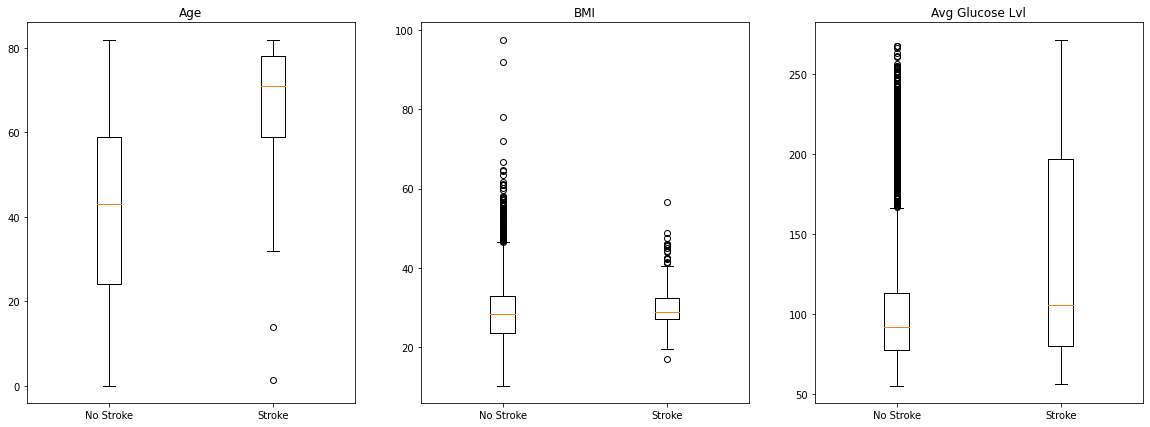

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(20, 7))

ax[0].boxplot([df_no_stroke['age'], df_stroke['age']])
ax[0].set_title('Age')
ax[0].set_xticklabels(['No Stroke', 'Stroke'])

ax[1].boxplot([df_no_stroke['bmi'], df_stroke['bmi']])
ax[1].set_title('BMI')
ax[1].set_xticklabels(['No Stroke', 'Stroke'])

ax[2].boxplot([df_no_stroke['avg_glucose_level'], df_stroke['avg_glucose_level']])
ax[2].set_title('Avg Glucose Lvl')
ax[2].set_xticklabels(['No Stroke', 'Stroke'])

plt.show()

From the boxplots, we see that a large amount of data are considered anomalous going by the upper and lower limit definitions of anomalies (q1 - 1.5 * IQR, q3 + 1.5 * IQR)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

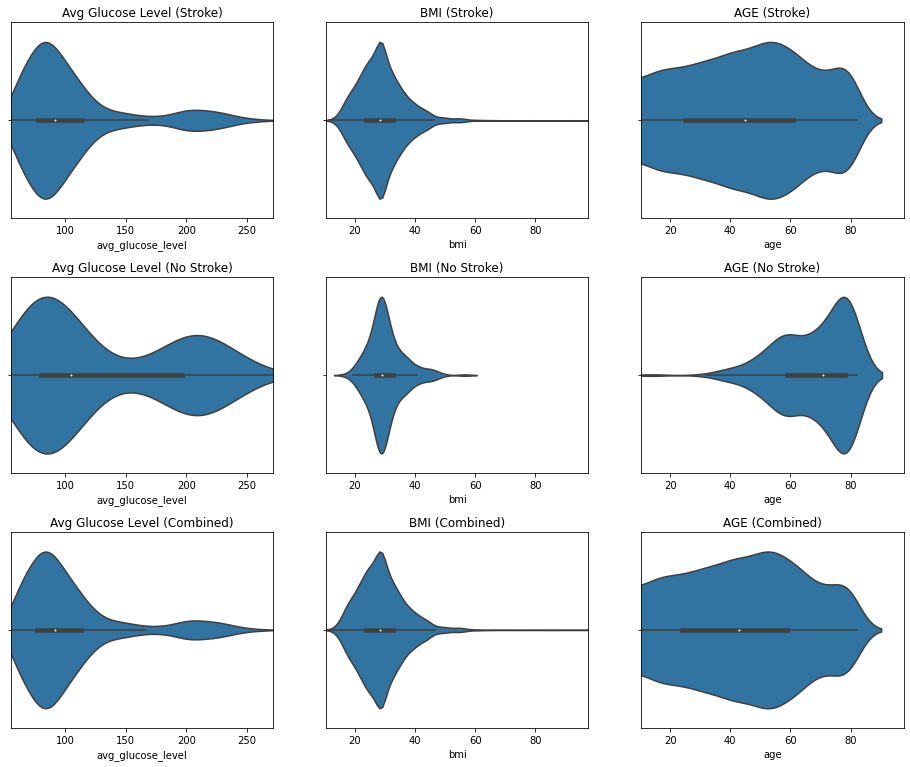

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(16, 10))

xlim_left = (df['avg_glucose_level'].min(), df['avg_glucose_level'].max())
sb.violinplot(df['avg_glucose_level'], ax=axes[0, 0])
sb.violinplot(df_stroke['avg_glucose_level'], ax=axes[1, 0])
sb.violinplot(df_no_stroke['avg_glucose_level'], ax=axes[2, 0])
axes[0, 0].title.set_text('Avg Glucose Level (Stroke)')
axes[1, 0].title.set_text('Avg Glucose Level (No Stroke)')
axes[2, 0].title.set_text('Avg Glucose Level (Combined)')
axes[0][0].set_xlim(xlim_left[0], xlim_left[1])
axes[1][0].set_xlim(xlim_left[0], xlim_left[1])
axes[2][0].set_xlim(xlim_left[0], xlim_left[1])

xlim_mid = (df['bmi'].min(), df['bmi'].max())
sb.violinplot(df['bmi'], ax=axes[0, 1])
sb.violinplot(df_stroke['bmi'], ax=axes[1, 1])
sb.violinplot(df_no_stroke['bmi'], ax=axes[2, 1])
axes[0, 1].title.set_text('BMI (Stroke)')
axes[1, 1].title.set_text('BMI (No Stroke)')
axes[2, 1].title.set_text('BMI (Combined)')
axes[0][1].set_xlim(xlim_mid[0], xlim_mid[1])
axes[1][1].set_xlim(xlim_mid[0], xlim_mid[1])
axes[2][1].set_xlim(xlim_mid[0], xlim_mid[1])

xlim_right = (df['age'].min(), df['age'].max())
sb.violinplot(df['age'], ax=axes[0, 2])
sb.violinplot(df_stroke['age'], ax=axes[1, 2])
sb.violinplot(df_no_stroke['age'], ax=axes[2, 2])
axes[0, 2].title.set_text('AGE (Stroke)')
axes[1, 2].title.set_text('AGE (No Stroke)')
axes[2, 2].title.set_text('AGE (Combined)')
axes[0][2].set_xlim(xlim_mid[0], xlim_mid[1])
axes[1][2].set_xlim(xlim_mid[0], xlim_mid[1])
axes[2][2].set_xlim(xlim_mid[0], xlim_mid[1])

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=.3)

plt.show()

Previously, we observed that there are a lot of "anomalies" for avg_glucose_level and bmi but they should not be removed. Based on the above violin plot for Avg Glucose Level (Combined), we see that the a lump of data points lying to the right of the upper limit will be removed if we consider them anomalous. This is a critical mistake because a large portion of Avg Glucose Level (Stroke) lies beyond this upper limit while Avg Glucose Level (No Stroke) doesn't

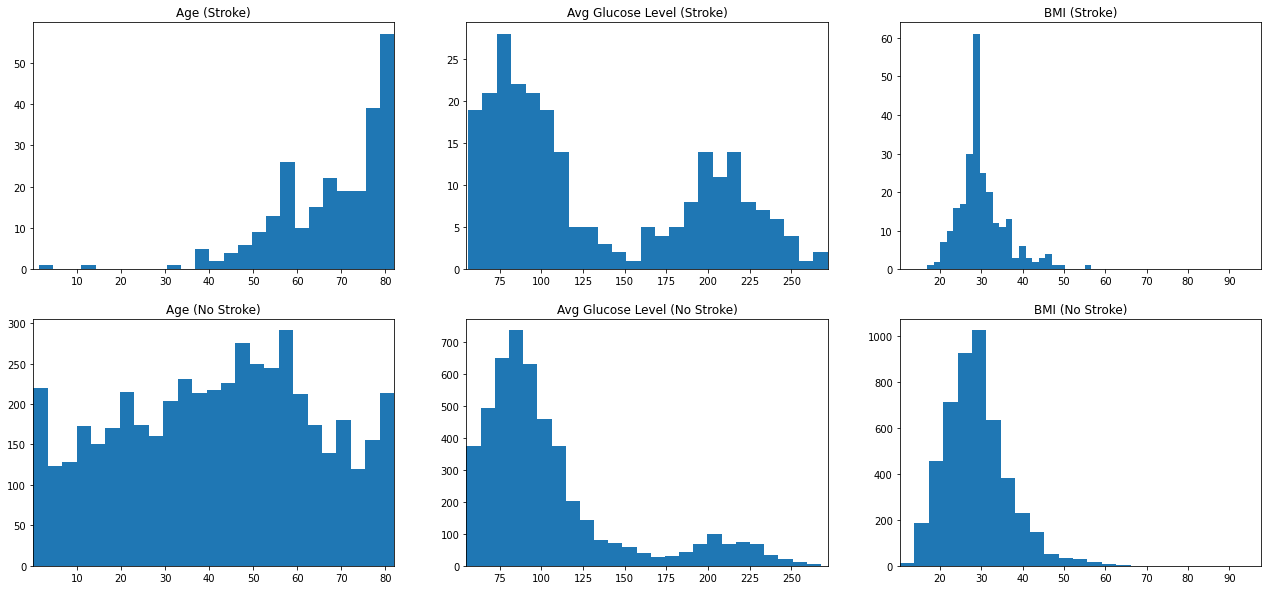

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(22, 10))

xlim_left = (df['age'].min(), df['age'].max())
axes[0][0].hist(df_stroke['age'], bins=25)
axes[0][0].title.set_text('Age (Stroke)')
axes[1][0].hist(df_no_stroke['age'], bins=25)
axes[1][0].title.set_text('Age (No Stroke)')
axes[0][0].set_xlim(xlim_left[0], xlim_left[1])
axes[1][0].set_xlim(xlim_left[0], xlim_left[1])

xlim_middle = (df['avg_glucose_level'].min(), df['avg_glucose_level'].max())
axes[0][1].hist(df_stroke['avg_glucose_level'], bins=25)
axes[0][1].title.set_text('Avg Glucose Level (Stroke)')
axes[1][1].hist(df_no_stroke['avg_glucose_level'], bins=25)
axes[1][1].title.set_text('Avg Glucose Level (No Stroke)')
axes[0][1].set_xlim(xlim_middle[0], xlim_middle[1])
axes[1][1].set_xlim(xlim_middle[0], xlim_middle[1])

xlim_right = (df['bmi'].min(), df['bmi'].max())
axes[0][2].hist(df_stroke['bmi'], bins=25)
axes[0][2].title.set_text('BMI (Stroke)')
axes[1][2].hist(df_no_stroke['bmi'], bins=25)
axes[1][2].title.set_text('BMI (No Stroke)')
axes[0][2].set_xlim(xlim_right[0], xlim_right[1])
axes[1][2].set_xlim(xlim_right[0], xlim_right[1])
plt.show()

In [ ]:
print('Mean of BMI (No Stroke):', df_no_stroke['bmi'].mean())
print('Mean of BMI (Stroke):', df_stroke['bmi'].mean())

Mean of BMI (No Stroke): 28.82538801538764
Mean of BMI (Stroke): 30.217789062135694


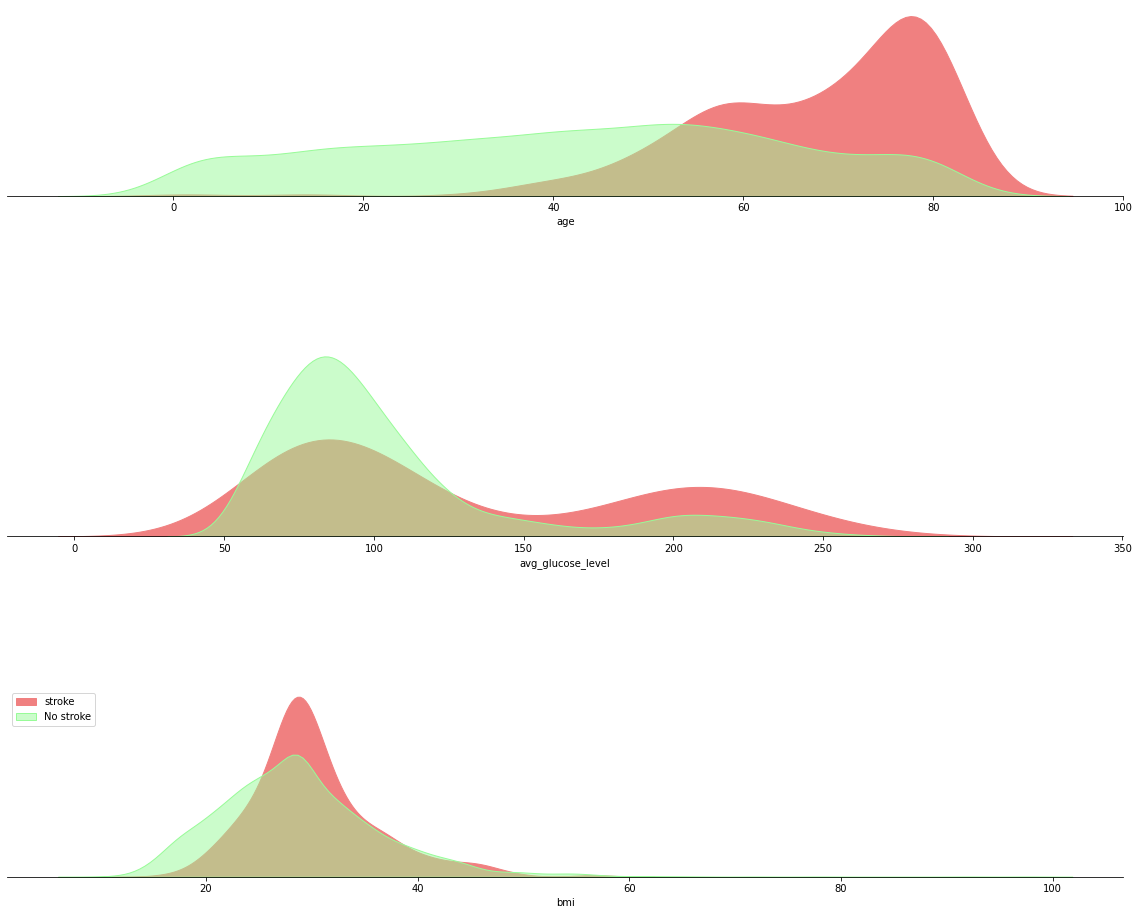

In [ ]:
fig=plt.figure(figsize=(20,16),facecolor='white')

ax=[None for i in range(3)]
gs=fig.add_gridspec(3,1)
gs.update(wspace=0, hspace=0.8)

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])
ax[2]=fig.add_subplot(gs[2,0])

sb.kdeplot(data=df[df.stroke==1],x='age',ax=ax[0],shade=True,color='lightcoral',alpha=1, label = "stroke")
sb.kdeplot(data=df[df.stroke==0],x='age',ax=ax[0],shade=True,color='palegreen',alpha=0.5, label = "No stroke")
sb.kdeplot(data=df[df.stroke==1],x='avg_glucose_level',ax=ax[1],shade=True,color='lightcoral',alpha=1, label = "stroke")
sb.kdeplot(data=df[df.stroke==0],x='avg_glucose_level',ax=ax[1],shade=True,color='palegreen',alpha=0.5, label = "No stroke")
sb.kdeplot(data=df[df.stroke==1],x='bmi',ax=ax[2],shade=True,color='lightcoral',alpha=1, label = "stroke")
sb.kdeplot(data=df[df.stroke==0],x='bmi',ax=ax[2],shade=True,color='palegreen',alpha=0.5, label = "No stroke")
plt.legend(loc="upper left")

for i in range(3):
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

**Analysis:**

1) As age increases, we notice that the number of people suffering from stroke increases. (Green graph spreads across the age range while the red graph is skewed towards the right of the age range)

2) As average glucose level increases, the number of people suffering from stroker also increases. (For avg_glucose_level between 150 - 300, the peak of the red graph is higher than the green graph)

3) As bmi increases, the number of people suffering from stroke increases. (Red graph is centralise more to the right compared to the green graph)

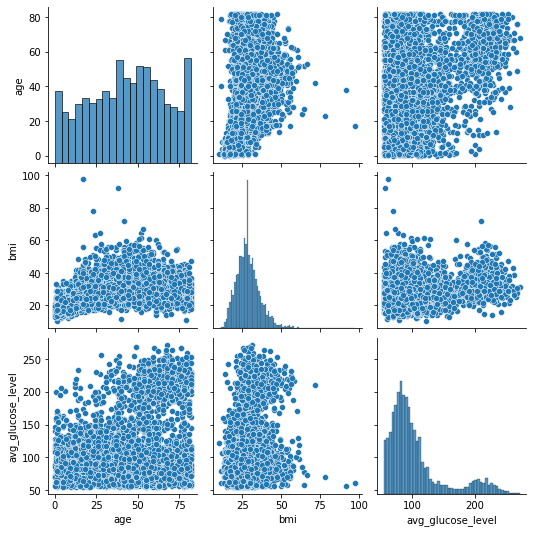

In [ ]:
#Relationship between numerical variables
df_joint = df[['age', 'bmi', 'avg_glucose_level']]
sb.pairplot(df_joint)

**Analysis**

From the scatter plots, we observe that there is no clear relationship between age, bmi and avg_glucose_level. 

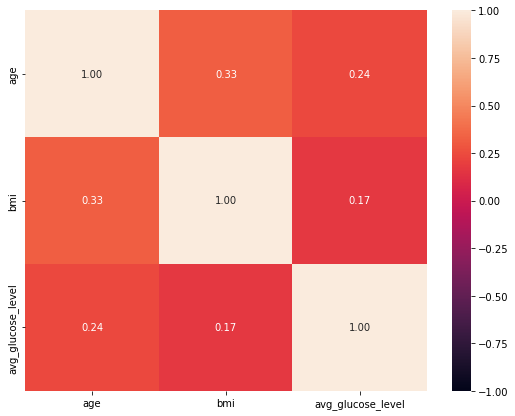

In [ ]:
fig = plt.figure(figsize=(9,7))
sb.heatmap(df_joint.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")

**Analysis**

From the heatmap, we observe that...

1) Positive correlation between age and bmi is the highest at 0.33

2) Positive correlation betweeen age and avg_glucose_level is 0.24

3) Positive correlation between bmi and avg_glucose level is the lowest at 0.17.

In general, the positive correlations between each pair of numerical variables are not very significant.

# **Analysis:**

**Relationship between paired, continuous variables and incidence of stroke**

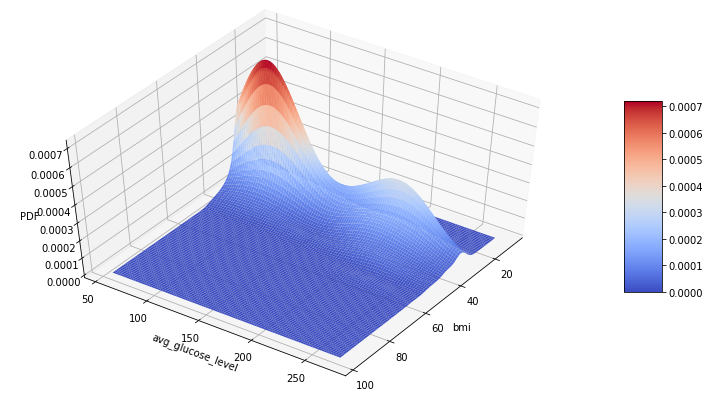

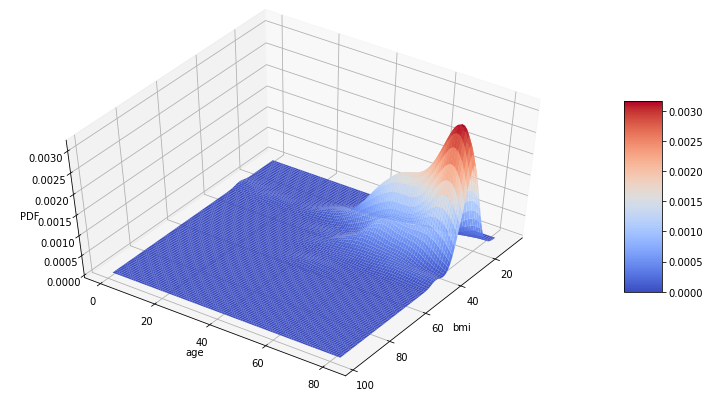

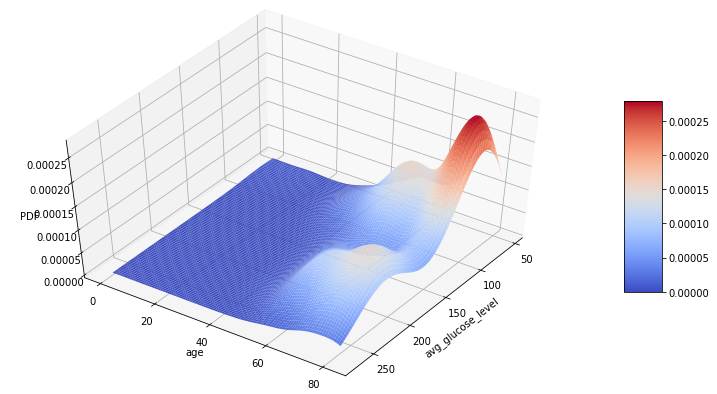

In [ ]:
def KDE_2D(df):
    vars = ['bmi', 'avg_glucose_level', 'age']
    for i in range(len(vars)):
        for j in range(i+1, len(vars)):
            x, y = df[vars[i]], df[vars[j]]
            kde = stats.gaussian_kde(np.array([x, y]), weights=df['stroke'])
            xs, ys = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
            positions = np.vstack([xs.ravel(), ys.ravel()])
            values = np.vstack([x, y])
            f = np.reshape(kde(positions).T, xs.shape)

            fig = plt.figure(figsize=(13, 7))
            ax = plt.axes(projection='3d')
            surf = ax.plot_surface(xs, ys, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
            ax.set_xlabel(vars[i])
            ax.set_ylabel(vars[j])
            ax.set_zlabel('PDF')
            fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
            ax.view_init(50, 35)
            plt.show()

# 2D KDE for stroke data
KDE_2D(df)

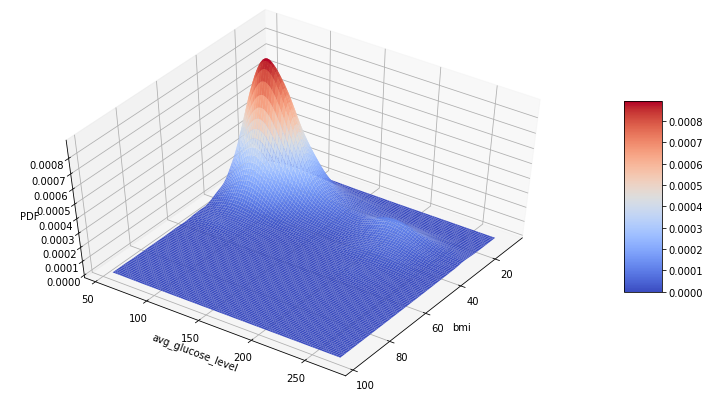

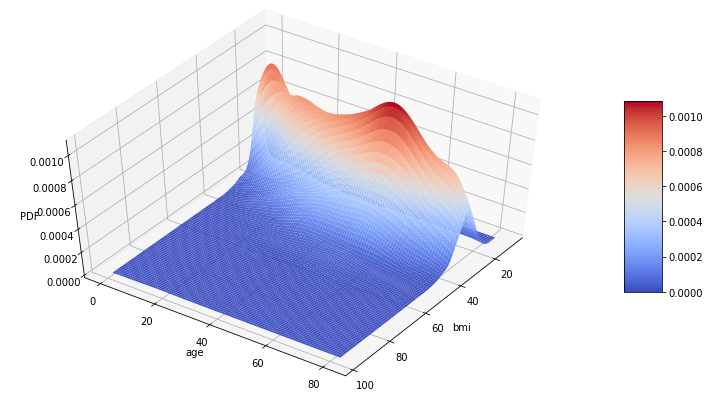

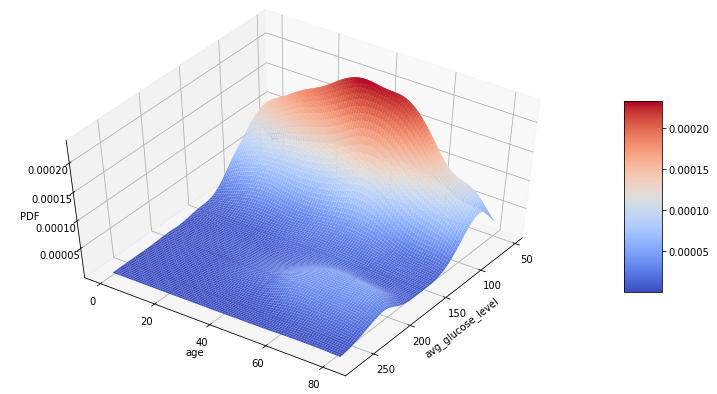

In [ ]:
# 2D KDE for no_stroke data
df_reverse = df.copy()

#Convert 0 -> 1 and 1 -> 0 for stroke label because PDF only counts the '1's
df_reverse['stroke'] = df_reverse['stroke'].apply(lambda x:(x+1)%2) 
KDE_2D(df_reverse)

**Analysis:**

High incidence of stroke when age is high, avg_glucose_level is low, bmi is 20-40 (probably because bmi is normally distributed and most people fall within the range so naturally more ppl of 20-40 bmi will get a stroke)

**Relationship between categorical variables and incidence of stroke**

Categorical data:
1) Gender
> 'Male' | 'Female'

2) Hypertension
> 1 | 0 

3) Heart Disease
> 1 | 0

4) Ever Married
> 'Yes' | 'No'

5) Work type
> 'Never_worked' | 'Children' | 'Government job' | 'Private' | 'Self-employed'

6) Residence Type
> 'Urban' | 'Rural'

7) Smoking Status
> 'Never smoked' | 'Formerly smoked' | 'Smokes' | 'Unknown'

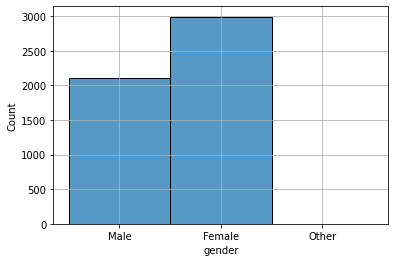

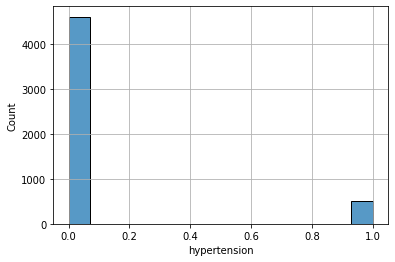

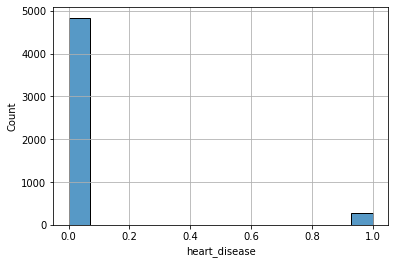

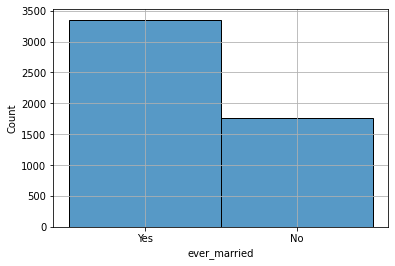

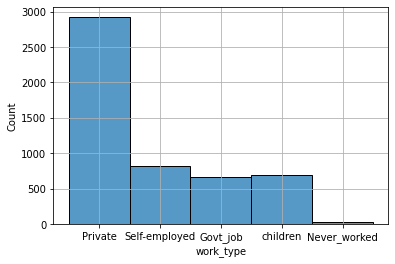

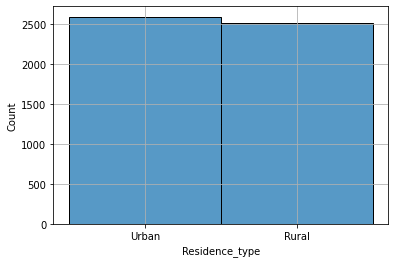

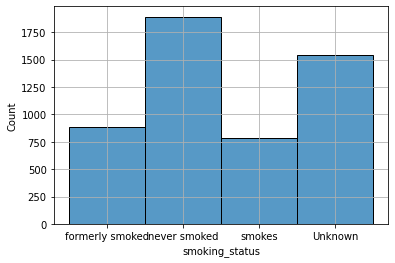

In [ ]:
# Plot distribution of categorical data in our dataset to identify any potential data bias
cat_features = ['gender','hypertension','heart_disease','ever_married',
                'work_type','Residence_type','smoking_status']

for feature in cat_features:
    sb.histplot(data = df[cat_features], x=feature)
    plt.grid()
    plt.show()

In [ ]:
#Check for label imbalance
target_count = df.stroke.value_counts()
print(target_count)
print()
print('Percentage of strokes [1]:', np.round(100*target_count[1] / target_count.sum(),2), '%')

0    4861
1     249
Name: stroke, dtype: int64

Percentage of strokes [1]: 4.87 %


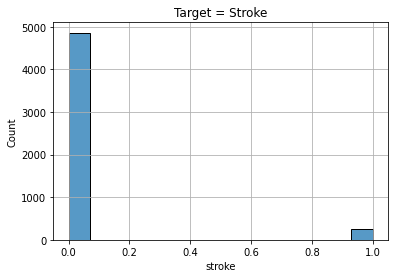

In [ ]:
sb.histplot(data = df[["stroke"]], x="stroke")
plt.title('Target = Stroke')
plt.grid()
plt.show()

Dataset is highly imbalanced, with 4.87% stroke data and 95.13% no_stroke data

In [ ]:
# Identify the distribution of each feature across stroke and no_stroke data
# The larger the difference, the more useful the feature as a predictor

print('+-----------------+------------+-----------+---------|')
print('| Category        | Has Stroke | No Stroke | Combine |')
print('+-----------------+------------+-----------+---------|')
for cat in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print('| (' + cat + ')')
    for sub_cat in df[cat].unique():
        print('| {: <15} | {:.2f}       | {:.2f}      | {:.2f}    |'.format(sub_cat, 
                                                                            df_stroke[df_stroke[cat]==sub_cat].shape[0] / df_stroke.shape[0], 
                                                                            df_no_stroke[df_no_stroke[cat]==sub_cat].shape[0] / df_no_stroke.shape[0],
                                                                            df[df[cat]==sub_cat].shape[0] / df.shape[0]))
    print('+-----------------+------------+-----------+---------|')

+-----------------+------------+-----------+---------|
| Category        | Has Stroke | No Stroke | Combine |
+-----------------+------------+-----------+---------|
| (gender)
| Male            | 0.43       | 0.41      | 0.41    |
| Female          | 0.57       | 0.59      | 0.59    |
| Other           | 0.00       | 0.00      | 0.00    |
+-----------------+------------+-----------+---------|
| (hypertension)
| 0               | 0.73       | 0.91      | 0.90    |
| 1               | 0.27       | 0.09      | 0.10    |
+-----------------+------------+-----------+---------|
| (heart_disease)
| 1               | 0.19       | 0.05      | 0.05    |
| 0               | 0.81       | 0.95      | 0.95    |
+-----------------+------------+-----------+---------|
| (ever_married)
| Yes             | 0.88       | 0.64      | 0.66    |
| No              | 0.12       | 0.36      | 0.34    |
+-----------------+------------+-----------+---------|
| (work_type)
| Private         | 0.60       | 0.57      

**Analysis:**

For **hypertension, heart_disease**, and **ever_married**, there is significant difference in the distributions for stroke and no_stroke so these features will be useful predictors

For **work_type**, the proportion of people in private, govt_job or never_worked are almost identifical for stroke and no_stroke so there is little predictive power. However, self-employed does come with a significantly higher incidence of stroke. Perhaps self-employment comes with the greater stress of having to manage a business. On the other hand, children almost never get a stroke, probably just because young people are least likely to get a stroke.

**Residence_type** has little predictive value since the proportions are equal for stroke and no_stroke

For **smoking_status**, there's a large portion of *unknown*. However, we should not remove this segment of datapoints even though it is equivalent to NaN because it is forms a substantial portion of the dataset (30%)




In [ ]:
def catplot_with_percentage(factors, cats, *args):
    df_catplot = {'Factor': factors}

    for i in range(len(cats)):
        df_catplot[cats[i]] = args[i]

    df_catplot = pd.DataFrame(df_catplot)

    fig = plt.figure(figsize=(len(factors)*2,9))
    catplot_smoke = df_catplot.melt(id_vars='Factor').rename(columns=str.title)
    sb.barplot(x='Factor', y='Value', hue='Variable', data=catplot_smoke)
    plt.show()
    
    df_catplot['Gap (%)'] = abs(df_catplot[cats[0]] - df_catplot[cats[1]])
    for i, row in df_catplot.iterrows():
        df_catplot.at[i, 'Gap (%)'] = round(100 * row['Gap (%)'] / min(row[cats[0]], row[cats[1]]), 2)

    print(df_catplot)

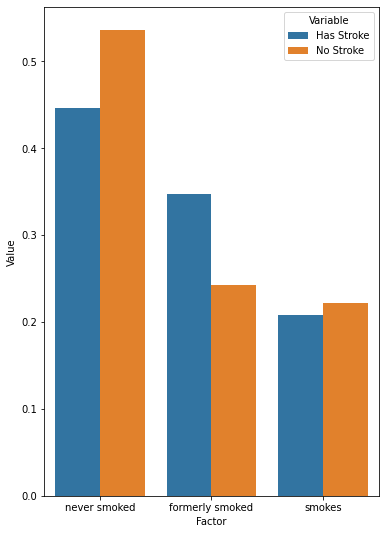

            Factor  Has Stroke  No Stroke  Gap (%)
0     never smoked    0.445545   0.535672    20.23
1  formerly smoked    0.346535   0.242271    43.04
2           smokes    0.207921   0.222057     6.80


In [ ]:
df_smoke_stroke = df_stroke[df_stroke['smoking_status'] != 'Unknown']
df_smoke_no_stroke = df_no_stroke[df_no_stroke['smoking_status'] != 'Unknown']
catplot_with_percentage(['never smoked', 'formerly smoked', 'smokes'], 
                        ['Has Stroke', 'No Stroke'],
                        [df_smoke_stroke[df_smoke_stroke['smoking_status']=='never smoked'].shape[0]/df_smoke_stroke.shape[0], 
                         df_smoke_stroke[df_smoke_stroke['smoking_status']=='formerly smoked'].shape[0]/df_smoke_stroke.shape[0], 
                         df_smoke_stroke[df_smoke_stroke['smoking_status']=='smokes'].shape[0]/df_smoke_stroke.shape[0]],
                        [df_smoke_no_stroke[df_smoke_no_stroke['smoking_status']=='never smoked'].shape[0]/df_smoke_no_stroke.shape[0], 
                         df_smoke_no_stroke[df_smoke_no_stroke['smoking_status']=='formerly smoked'].shape[0]/df_smoke_no_stroke.shape[0], 
                         df_smoke_no_stroke[df_smoke_no_stroke['smoking_status']=='smokes'].shape[0]/df_smoke_no_stroke.shape[0]]
                        )

**Analysis:**

Never smoked: Significantly higher % of no_stroke than stroke. Hence, not smoking = lower incidence of stroke

Formerly smoked: Significantly higher & of stroke than no_stroke. Hence, formerly smoked = higher incidence of stroke

**Combining Categorical Variables**

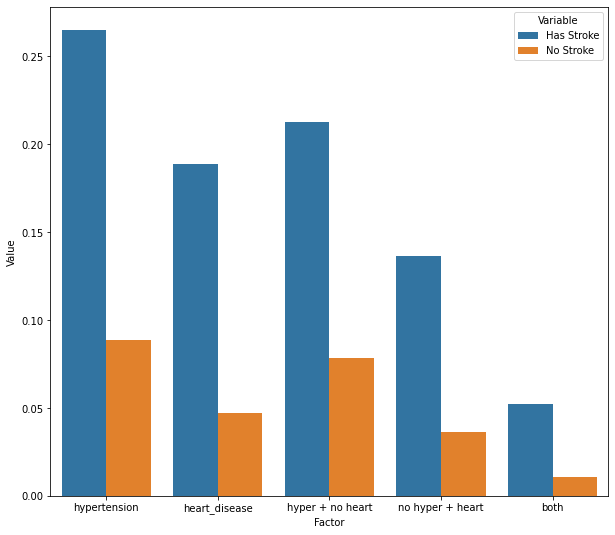

             Factor  Has Stroke  No Stroke  Gap (%)
0      hypertension    0.265060   0.088871   198.25
1     heart_disease    0.188755   0.047110   300.67
2  hyper + no heart    0.212851   0.078379   171.57
3  no hyper + heart    0.136546   0.036618   272.89
4              both    0.052209   0.010492   397.62


In [ ]:
'''
Hypertension + Heart Disease
To see whether the combination of these 2 features is a better predictor (greater difference across stroke and no stroke)
'''

catplot_with_percentage(['hypertension', 'heart_disease', 'hyper + no heart', 'no hyper + heart', 'both'], 
                        ['Has Stroke', 'No Stroke'],
                        [df_stroke[df_stroke['hypertension']==1].shape[0]/df_stroke.shape[0], 
                         df_stroke[df_stroke['heart_disease']==1].shape[0]/df_stroke.shape[0], 
                         df_stroke[(df_stroke['hypertension']==1) & (df_stroke['heart_disease']==0)].shape[0]/df_stroke.shape[0],
                         df_stroke[(df_stroke['hypertension']==0) & (df_stroke['heart_disease']==1)].shape[0]/df_stroke.shape[0],
                         df_stroke[(df_stroke['hypertension']==1) & (df_stroke['heart_disease']==1)].shape[0]/df_stroke.shape[0]],
                        [df_no_stroke[df_no_stroke['hypertension']==1].shape[0]/df_no_stroke.shape[0], 
                         df_no_stroke[df_no_stroke['heart_disease']==1].shape[0]/df_no_stroke.shape[0], 
                         df_no_stroke[(df_no_stroke['hypertension']==1) & (df_no_stroke['heart_disease']==0)].shape[0]/df_no_stroke.shape[0],
                         df_no_stroke[(df_no_stroke['hypertension']==0) & (df_no_stroke['heart_disease']==1)].shape[0]/df_no_stroke.shape[0],
                         df_no_stroke[(df_no_stroke['hypertension']==1) & (df_no_stroke['heart_disease']==1)].shape[0]/df_no_stroke.shape[0]]
                        )

When a person has hypertension and heart disease, there is a substantial increase in the gap between no_stroke and stroke.

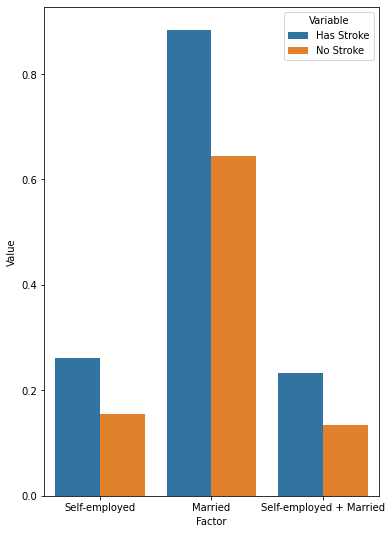

                    Factor  Has Stroke  No Stroke  Gap (%)
0            Self-employed    0.261044   0.155112    68.29
1                  Married    0.883534   0.644518    37.08
2  Self-employed + Married    0.232932   0.133923    73.93


In [ ]:
catplot_with_percentage(['Self-employed', 'Married', 'Self-employed + Married'], 
                        ['Has Stroke', 'No Stroke'],
                        [df_stroke[df_stroke['work_type']=='Self-employed'].shape[0]/df_stroke.shape[0], 
                         df_stroke[df_stroke['ever_married']=='Yes'].shape[0]/df_stroke.shape[0],
                         df_stroke[(df_stroke['work_type']=='Self-employed') & (df_stroke['ever_married']=='Yes')].shape[0]/df_stroke.shape[0]],
                        [df_no_stroke[df_no_stroke['work_type']=='Self-employed'].shape[0]/df_no_stroke.shape[0], 
                         df_no_stroke[df_no_stroke['ever_married']=='Yes'].shape[0]/df_no_stroke.shape[0],
                         df_no_stroke[(df_no_stroke['work_type']=='Self-employed') & (df_no_stroke['ever_married']=='Yes')].shape[0]/df_no_stroke.shape[0]]
                        )

Only minor improvement of 5% when combining work type with marriage status. 

In [ ]:
def get_100_percent_stacked_bar_chart(column, width = 0.5):
    # Get the count of records by column and stroke
    df_breakdown = df.groupby([column, 'stroke'])['age'].count()
    # Get the count of records by gender
    df_total = df.groupby([column])['age'].count()
    # Get the percentage for 100% stacked bar chart
    df_pct = df_breakdown / df_total * 100
    
    offset = sorted(list(df_pct))[-2] * 0.9

    # Create proper DataFrame's format
    df_pct = df_pct.unstack()
    
    for col in df_pct.columns:
        df_pct[col] = df_pct[col].apply(lambda x:x - offset if x > offset else x)
    
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=width, bottom=offset);

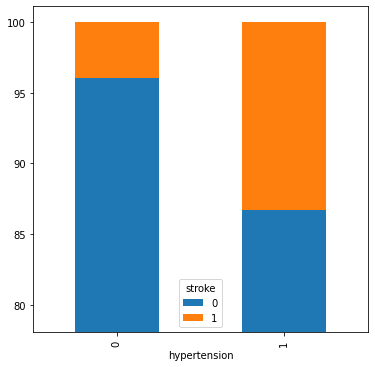

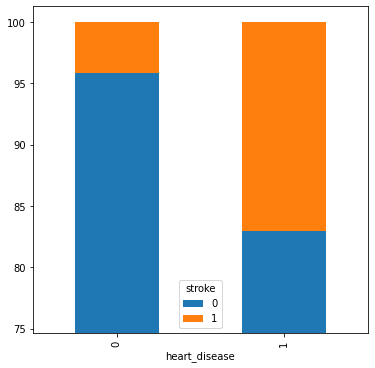

In [ ]:
get_100_percent_stacked_bar_chart('hypertension')
get_100_percent_stacked_bar_chart('heart_disease')

**Insight #1:**
As seen from the bar charts above, people with hypertension and heart disease are more likely to have a stroke

age           
              count       mean
work_type                     
Govt_job        657  50.879756
Never_worked     22  16.181818
Private        2925  45.503932
Self-employed   819  60.201465
children        687   6.841339

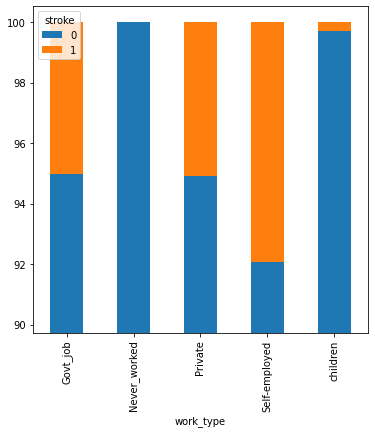

In [ ]:
get_100_percent_stacked_bar_chart('work_type')
df.groupby(['work_type'])[['age']].agg(['count', 'mean'])

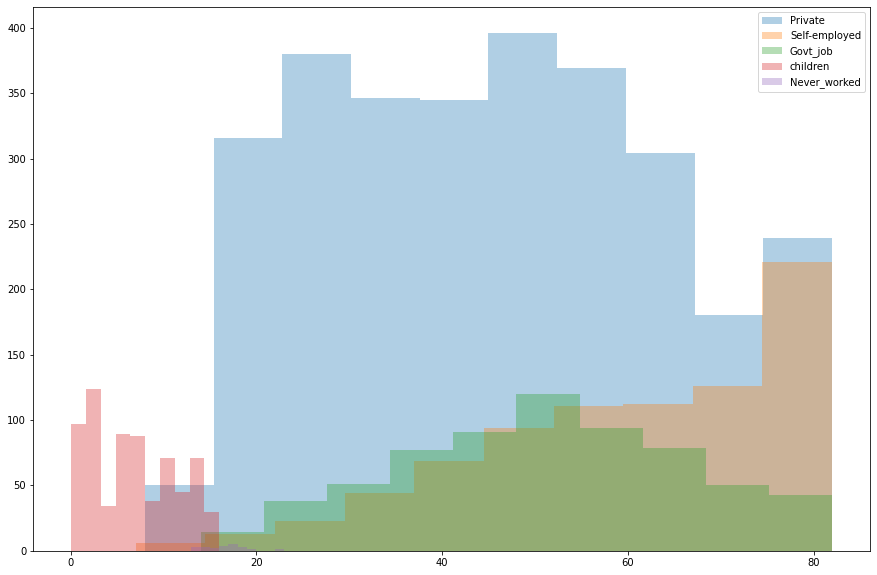

In [ ]:
f = plt.figure(figsize=(15,10))
for unique in df['work_type'].unique():
    plt.hist(df[df['work_type']==unique]['age'], alpha=0.35, label=unique)

plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


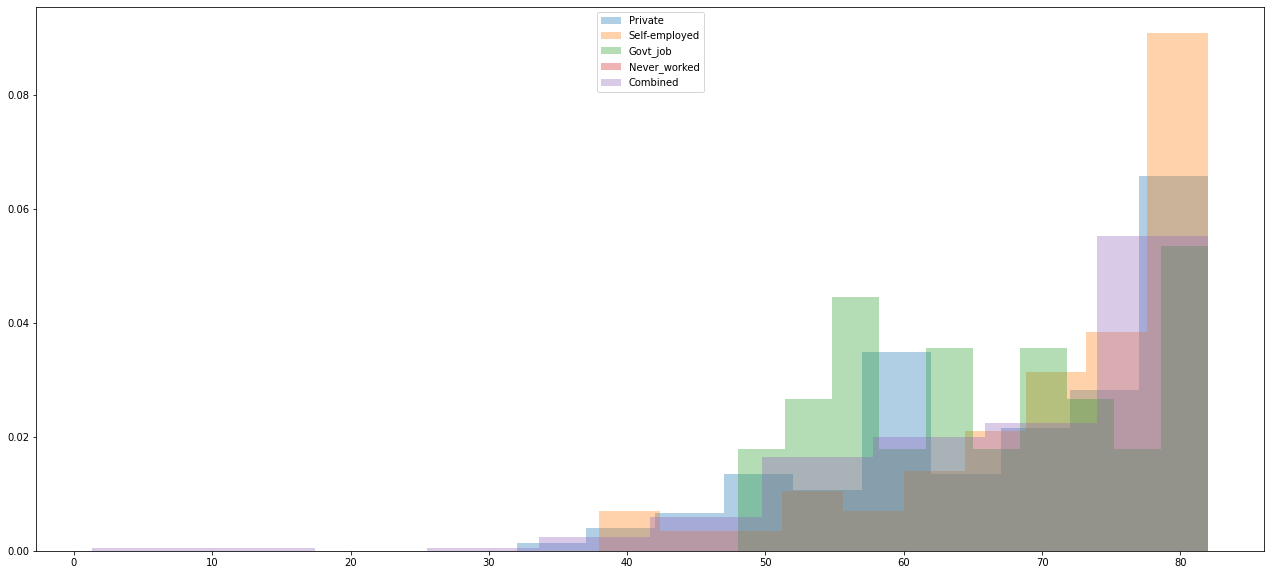

In [ ]:
f = plt.figure(figsize=(22,10))
for unique in df['work_type'].unique():
    if unique != 'children':
        plt.hist(df_stroke[df_stroke['work_type']==unique]['age'], density=True, alpha=0.35, label=unique)

plt.hist(df_stroke['age'], density=True, alpha=0.35, label='Combined')
plt.legend(loc='best')
plt.show()

**Insight #2**

As seen from the stacked bar chart above, one might think that those with goverment jobs, work in the private sector or self-employed are more likely to suffer from a stroke. However, by observing the age distribution for each work type, we realise that people in goverment jobs, the private sector or self-employed are generally older. The age distribution of stroke patients for each work type also resembles the combined age distribution of all stroke patients to a certain extent, so age might be the main underlying factor.

Only Govt_job and Private employees show a substantial deviation from the combined age distribution for stroke.

age           
             count       mean
ever_married                 
No            1757  22.014229
Yes           3353  54.342082

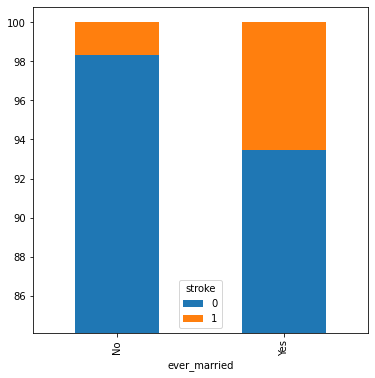

In [ ]:
get_100_percent_stacked_bar_chart('ever_married')
df.groupby(['ever_married'])[['age']].agg(['count', 'mean'])

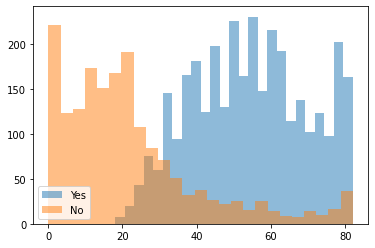

In [ ]:
plt.hist(df[df['ever_married']=='Yes']['age'], bins=25, alpha=0.5, label='Yes')
plt.hist(df[df['ever_married']=='No']['age'], bins=25, alpha=0.5, label='No')
plt.legend(loc='lower left')
plt.show()

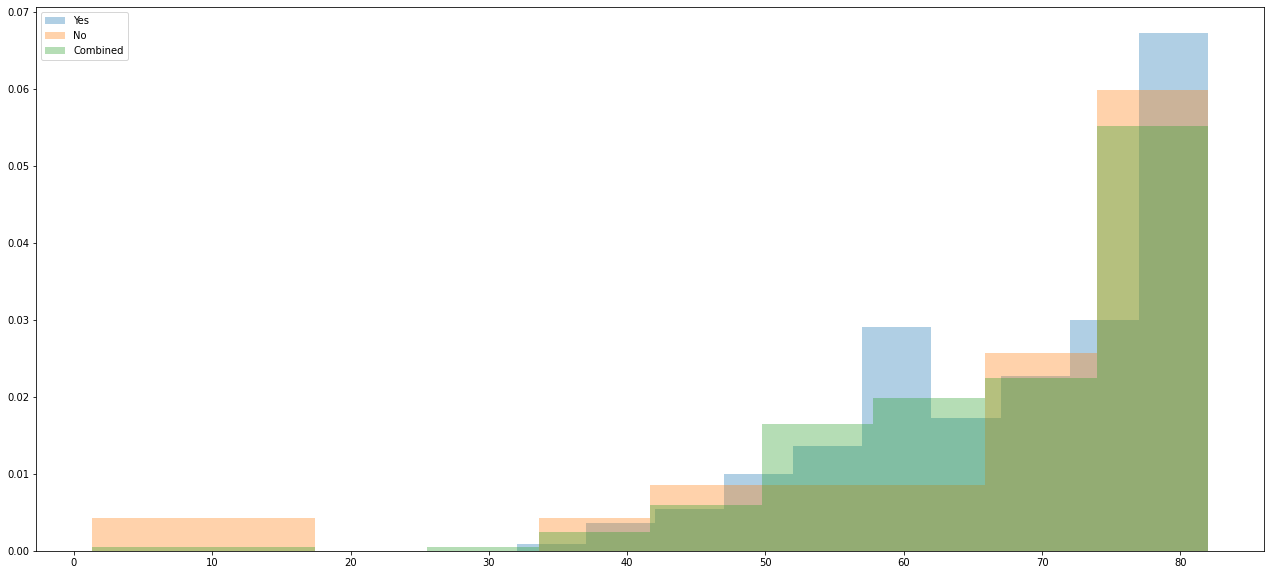

In [ ]:
f = plt.figure(figsize=(22,10))
for unique in df['ever_married'].unique():
    plt.hist(df_stroke[df_stroke['ever_married']==unique]['age'], density=True, alpha=0.35, label=unique)

plt.hist(df_stroke['age'], density=True, alpha=0.35, label='Combined')
plt.legend(loc='best')
plt.show()

**Insight #3:**

From the above stacked bar chart, similar to work types, those who are married may seem to more liekely suffer from a stroke. However, observing the age distribution of those who are married (histogram), it is possible that the married ones are more likely to get stroke because they are of higher age than the unmarried ones.

In [ ]:
def one_hot_encoding(df, col_name):
    for val in df[col_name].unique():
        df[col_name+'_'+val] = df[col_name].apply(lambda x:1 if x==val else 0)
    df.drop([col_name], axis=1, inplace=True)
    
    return df

In [ ]:
for category in ['Residence_type', 'gender', 'work_type', 'ever_married', 'smoking_status']:
    df = one_hot_encoding(df, category)

df_stroke = df[df['stroke']==1]
df_no_stroke = df[df['stroke']==0]

df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Residence_type_Urban,Residence_type_Rural,gender_Male,gender_Female,...,work_type_Self-employed,work_type_Govt_job,work_type_children,work_type_Never_worked,ever_married_Yes,ever_married_No,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_Unknown
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,61.0,0,0,202.21,28.893237,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
2,80.0,0,1,105.92,32.500000,1,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,79.0,1,0,174.12,24.000000,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
5107,35.0,0,0,82.99,30.600000,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
5108,51.0,0,0,166.29,25.600000,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# Output preprocessed dataset

rearranged = list(df.columns)
rearranged.remove('stroke')
rearranged += ['stroke']

# Move label column to last column
df = df[rearranged]
df.to_csv('stroke_cat.csv', index=False) 

Please download **stroke_cat.csv** and upload to google drive before running **Machine Learning Models.ipynb**